In [0]:
# 做人臉辨識, 拿別人的CNN來處理, 主要看眉毛, 眼睛, 鼻子, 嘴巴
# 用的函市庫是 face_recognition : https://github.com/ageitgey/face_recognition
# 每個人畫成那個人的語意向量

In [2]:
# 灌 face_recognition 
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=d57cddbe419161bfe56c1b093792a86f812016534d42ba7a05a47c60f45e9d99
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


結衣長這樣 [-0.01618614  0.12676561  0.04101241 -0.08212977 -0.10170147  0.06399666
 -0.08012764 -0.06920892  0.19565965 -0.16311914  0.24629004 -0.03446779
 -0.23793235 -0.0071743  -0.01288929  0.18573496 -0.19027288 -0.19959813
 -0.00850716  0.08744159  0.06879297  0.06583901 -0.02882146  0.00756061
 -0.148922   -0.37328854 -0.13069993 -0.01483572 -0.03284116 -0.05287176
 -0.01949585  0.01886426 -0.18371367  0.03054175  0.09599811  0.1317426
 -0.04212451 -0.10267353  0.13553175  0.03385166 -0.32884607  0.05492638
  0.09521761  0.22434291  0.10832208  0.0291515  -0.02448029 -0.16104543
  0.08472552 -0.17127918  0.07728669  0.19224238  0.08560663  0.09292373
  0.03953454 -0.14626525  0.00909577  0.14718589 -0.11433884 -0.01110617
  0.09750497 -0.02510362  0.05007994 -0.12971154  0.16745317  0.07531139
 -0.11142019 -0.23919816  0.11579248 -0.13103642 -0.10406461  0.13709959
 -0.1812427  -0.24179767 -0.23609197  0.02684955  0.35778236  0.15238695
 -0.13877058  0.03095979  0.0372891  -0.011659

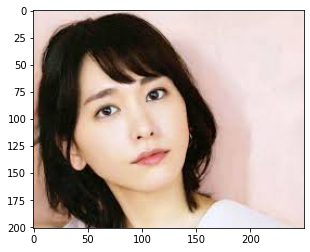

In [3]:
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline
img = face_recognition.load_image_file("結衣.jpg")
en = face_recognition.face_encodings(img)
print("結衣長這樣", en[0])
plt.imshow(img)

In [4]:
import glob
subs = ["jpg", "png", "jpeg"]

names, encodings = [], []
for fn in glob.glob("*"):
    sub = fn.split(".")[-1]
    if sub.lower() in subs:
        n = fn.split(".")[0]
        names.append(n)
        img = face_recognition.load_image_file(fn)
        en = face_recognition.face_encodings(img)[0]
        encodings.append(en)
print(names)
print(encodings)

['韓國瑜', '結衣', '蔡英文']
[array([-0.04539403,  0.07220482, -0.00379621, -0.01102665, -0.04474988,
        0.00092461, -0.04510008, -0.14032504,  0.10095094, -0.02278872,
        0.2400956 , -0.05297805, -0.14477719, -0.15912414, -0.04978693,
        0.19774058, -0.22071964, -0.17958808, -0.06596068,  0.0029785 ,
        0.04720681, -0.02916364,  0.01707636,  0.02540702, -0.02917354,
       -0.32346472, -0.07676034, -0.08478197,  0.0578362 , -0.05297958,
       -0.07900199,  0.00181681, -0.23453729, -0.10322905,  0.0903919 ,
        0.10319278, -0.03497536, -0.11465881,  0.17106175,  0.03116469,
       -0.18205136,  0.10687605,  0.06308328,  0.21635213,  0.21573885,
        0.03268558,  0.06573346, -0.16139549,  0.11578017, -0.10422875,
       -0.04498674,  0.19199722,  0.09454333,  0.06080515, -0.02939138,
       -0.12064529,  0.00172005,  0.10364718, -0.07982586,  0.00975238,
        0.09391582, -0.077384  , -0.00539202, -0.09999226,  0.18797302,
        0.02386377, -0.08596709, -0.250249

請輸入網址:https://api.elle.com.hk/var/ellehk/storage/images/celebrity/feature/satomi-ishihara-vs-yui-aragaki/29640663-1-chi-HK/_1_img_1040_780.png


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 韓國瑜 的距離: 0.7089884006287804
跟 結衣 的距離: 0.49748702944323325
跟 蔡英文 的距離: 0.6620616880979493
應該是: 結衣
--------------------------------------------------
跟 韓國瑜 的距離: 0.6747637453880753
跟 結衣 的距離: 0.33499032764219216
跟 蔡英文 的距離: 0.6471860233778504
應該是: 結衣
--------------------------------------------------


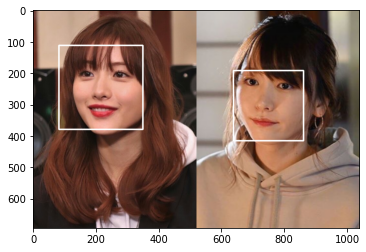

In [6]:
import requests
import cv2

url = input("請輸入網址:")
response = requests.get(url, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)

ens = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)

for top, right, bottom, left in locs:
    # 圖片, 左上座標, 右下座標, 顏色, 粗細
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 4)

for en in ens:
    distances = face_recognition.face_distance(en, encodings)
    for n, d in zip(names, distances):
        print("跟", n, "的距離:", d)
    idx = distances.argmin(axis=-1)
    print("應該是:", names[idx])
    print("-" * 50)

plt.imshow(img)